In [ ]:
from google.colab import drive
drive.mount('/MyDrive/')
#drive.mount('/content/drive') # Roberto

Mounted at /MyDrive/


In [ ]:
#Cargado de datos
import csv
import pandas as pd
import numpy as np
import io
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
#Cargar datos de Fallecidos, Hospitalizados, Vacunados

df = pd.read_csv('/MyDrive/MyDrive/DATABASES/fallecidos_covid_v3.csv', encoding='utf8')
#df = pd.read_csv('/content/drive/MyDrive/fallecidos_covid_v3.csv',encoding='utf8')  # Roberto
#df = pd.read_csv('https://raw.githubusercontent.com/verajulio823/covid_fallecidos/master/fallecidos_covid_v4.csv', encoding='utf8')

df.head()

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,dolor_pecho,otros_sintomas,Ciex,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones
0,4666249,2021-04-18,78,M,Criterio virol+â-¦gico,90119.0,HUANCAVELICA,HUANCAVELICA,HUANDO,1,...,NaN,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,80120.0,0.00,1
1,211570,2021-05-23,76,M,Criterio SINADEF,221005.0,SAN MARTIN,TOCACHE,UCHIZA,0,...,NaN,NaN,Otras gastroenteritis y colitis no especificad...,A090 - Otras gastroenteritis y colitis no espe...,A09 - OTRAS GASTROENTERITIS Y COLITIS DE ORIGE...,(A00 - A09) ENFERMEDADES INFECCIOSAS INTESTINALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210805.0,0.00,9
2,211570,2021-05-23,76,M,Criterio SINADEF,221005.0,SAN MARTIN,TOCACHE,UCHIZA,0,...,NaN,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210805.0,0.00,9
3,1332726,2021-05-14,53,M,Criterio virol+â-¦gico,150142.0,LIMA,LIMA,VILLA EL SALVADOR,1,...,0.0,1.0,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140133.0,19.17,4
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,NaN,NaN,"Infeccion debida a Coronavirus, sin otra Espec...","B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,NaN,1


In [ ]:
# df["flag_vacuna"].unique()

array([0, 1, 2])

In [ ]:
df.head()

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,dolor_pecho,otros_sintomas,Ciex,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones
0,4666249,2021-04-18,78,M,Criterio virol+â-¦gico,90119.0,HUANCAVELICA,HUANCAVELICA,HUANDO,1,...,NaN,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,80120.0,0.00,1
1,211570,2021-05-23,76,M,Criterio SINADEF,221005.0,SAN MARTIN,TOCACHE,UCHIZA,0,...,NaN,NaN,Otras gastroenteritis y colitis no especificad...,A090 - Otras gastroenteritis y colitis no espe...,A09 - OTRAS GASTROENTERITIS Y COLITIS DE ORIGE...,(A00 - A09) ENFERMEDADES INFECCIOSAS INTESTINALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210805.0,0.00,9
2,211570,2021-05-23,76,M,Criterio SINADEF,221005.0,SAN MARTIN,TOCACHE,UCHIZA,0,...,NaN,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210805.0,0.00,9
3,1332726,2021-05-14,53,M,Criterio virol+â-¦gico,150142.0,LIMA,LIMA,VILLA EL SALVADOR,1,...,0.0,1.0,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140133.0,19.17,4
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,NaN,NaN,"Infeccion debida a Coronavirus, sin otra Espec...","B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,NaN,1


# CONFIGURATION

In [ ]:
#Columnas a eliminar
DROP_COLUMNS = [
                'eess_renaes',
                'eess_diresa',
                'eess_red',
                'eess_nombre',
                'fecha_segumiento_hosp_ultimo',
                'evolucion_hosp_ultimo',
                'criterio_fallecido',
                'dpt_cdc',
                'prov_cdc',
                'dist_cdc',
                'dep_domicilio',
                'prov_domicilio',
                #'dist_domicilio',
                'fecha_dosis2',
                'fecha_ingreso_hosp',
                'fecha_ingreso_uci',
                'fecha_ingreso_ucin',
                'fecha_fallecimiento',
                #'fecha_segumiento_hosp_ultimo',
                'fecha_dosis1',
                'ubigeo_cdc',
                'ubigeo_inei_domicilio',
                'ubigeo_reniec',
                'tos',
                'cefalea',
                'congestion_nasal',
                'dificultad_respiratoria',
                'dolor_garganta',
                'fiebre',
                'diarrea',
                'anosmia_hiposmia',
                'dolor_abdominal',
                'dolor_articulaciones',
                'dolor_muscular',
                'dolor_pecho',
                'otros_sintomas',
                'Ciex',
                'DescCiex',
                'Grupo',
                'fabricante_dosis2',
                'distanciaKm',
                ]

#Fechas a eliminar para procesar
DROP_DATES = [
              'fecha_dosis2',
              'fecha_ingreso_hosp',
              'fecha_ingreso_uci',
              'fecha_ingreso_ucin',
              'fecha_fallecimiento',
              'fecha_dosis1'
              ]

COL_CATEGORICAS =[
                  'sexo',
                  'fabricante_dosis1',
                  #'fabricante_dosis2',
                  'cdc_positividad',
                  'Categoria',
                  'Capitulo',
                  'flag_vacuna',
                  ]
COL_NUMERICO = [
                'edad',
               # 'distanciaKm',
                'numero_atenciones',
                'dias_fallecido_primera_dosis',
                'dias_fallecido_segunda_dosis',
                'dias_fallecido_entre_segunda_primera_dosis'
]

In [ ]:
class BinarizadorCategorico(preprocessing.LabelBinarizer):
  def fit(self, X, y=None):
    super(BinarizadorCategorico, self).fit(X)

  def transform(self, X, y=None):
    return super(BinarizadorCategorico, self).transform(X)

  def fit_transform(self, X, y=None):
    return super(BinarizadorCategorico, self).fit(X).transform(X)

class ColumnExtractor(TransformerMixin):
  def __init__(self, columns):
    self.columns = columns

  def transform(self, X, **transform_params):
    return X[self.columns].to_numpy()

  def fit(self, X, y=None, **fit_params):
    return self

#class DropColumns():
#  sef__ init__(self, columns)

#  def fit(self, X, y=None)
#    return X.drop(columns, axis =1, inplace =True)

#Class selectData():

# Pre-procesamiento de datos


*   Eliminación de columnas innecesarias
*   Tratamiento y/o completación de datos nulos




In [ ]:
#separamos solo los fallecidos con vacunas

df_fallecidos_vac = df[df['flag_vacuna'] > 0]

df_fallecidos_vac.head(100)

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,dolor_pecho,otros_sintomas,Ciex,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,NaN,NaN,"Infeccion debida a Coronavirus, sin otra Espec...","B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,NaN,1
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,NaN,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.00,1
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,NaN,NaN,"Septicemia, no Especificada","A419 - Septicemia, no Especificada",A41 - OTRAS SEPTICEMIAS,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.00,19
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,NaN,NaN,TBC Respiratoria no Especificada / TBC Pulmona...,A169 - TBC Respiratoria no Especificada / TBC ...,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.00,1
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,NaN,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,11667559,2021-06-13,71,F,Criterio virol+â-¦gico,120114.0,JUNIN,HUANCAYO,EL TAMBO,0,...,NaN,NaN,"Insuficiencia Respiratoria, no Especificada","J969 - Insuficiencia Respiratoria, no Especifi...","J96 - INSUFICIENCIA RESPIRATORIA, NO CLASIFICA...",(J95 - J99) OTRAS ENFERMEDADES DEL SISTEMA RES...,CAPITULO X: ENFERMEDADES DEL SISTEMA RESPIRATORIO,110113.0,0.00,1
1952,22541241,2021-06-26,84,F,Criterio virol+â-¦gico,220101.0,SAN MARTIN,MOYOBAMBA,MOYOBAMBA,1,...,NaN,NaN,"Insuficiencia Respiratoria, no Especificada","J969 - Insuficiencia Respiratoria, no Especifi...","J96 - INSUFICIENCIA RESPIRATORIA, NO CLASIFICA...",(J95 - J99) OTRAS ENFERMEDADES DEL SISTEMA RES...,CAPITULO X: ENFERMEDADES DEL SISTEMA RESPIRATORIO,210505.0,38.39,1
1957,302574,2021-06-17,69,M,Criterio virol+â-¦gico,120125.0,JUNIN,HUANCAYO,PILCOMAYO,1,...,NaN,NaN,"Insuficiencia Respiratoria, no Especificada","J969 - Insuficiencia Respiratoria, no Especifi...","J96 - INSUFICIENCIA RESPIRATORIA, NO CLASIFICA...",(J95 - J99) OTRAS ENFERMEDADES DEL SISTEMA RES...,CAPITULO X: ENFERMEDADES DEL SISTEMA RESPIRATORIO,140112.0,157.85,4
1972,25042620,2021-02-02,62,M,Criterio serol+â-¦gico,150143.0,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,0,...,NaN,NaN,"Insuficiencia Respiratoria, no Especificada","J969 - Insuficiencia Respiratoria, no Especifi...","J96 - INSUFICIENCIA RESPIRATORIA, NO CLASIFICA...",(J95 - J99) OTRAS ENFERMEDADES DEL SISTEMA RES...,CAPITULO X: ENFERMEDADES DEL SISTEMA RESPIRATORIO,140137.0,16.44,1


In [ ]:
df_fallecidos_vac.shape

(3792, 52)

In [ ]:
#Calculamos los días transcurridos despues de la primera dosis
df_fallecidos_vac[['fecha_fallecimiento','fecha_dosis1']] = pd.to_datetime(df_fallecidos_vac[['fecha_fallecimiento','fecha_dosis1']].stack(), format='%Y-%m-%d').unstack()
df_fallecidos_vac['dias_fallecido_primera_dosis'] = (df_fallecidos_vac['fecha_fallecimiento'] - df_fallecidos_vac['fecha_dosis1']).dt.days

<ipython-input-8-eb9b309604b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac[['fecha_fallecimiento','fecha_dosis1']] = pd.to_datetime(df_fallecidos_vac[['fecha_fallecimiento','fecha_dosis1']].stack(), format='%Y-%m-%d').unstack()
<ipython-input-8-eb9b309604b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac['dias_fallecido_primera_dosis'] = (df_fallecidos_vac['fecha_fallecimiento'] - df_fallecidos_vac['fecha_dosis1']).dt.days


In [ ]:
#Verificamos que los días entre vacuna y fecha de fallecimiento sean positivos
df_fallecidos_vac_positive = df_fallecidos_vac[df_fallecidos_vac['dias_fallecido_primera_dosis'] > 0]
df_fallecidos_vac_positive.shape

(7376, 53)

In [ ]:
df_fallecidos_vac_positive['fecha_dosis1'].isna()

4         False
11        False
19        False
39        False
45        False
          ...  
199522    False
199526    False
199529    False
199565    False
199570    False
Name: fecha_dosis1, Length: 7376, dtype: bool

## Datos de fallecidos con días negativos

In [ ]:
#datos de fallecidos que se les asigno que estaban vacunados aún cuando murieron antes de inyectarse una vacuna
df_fallecidos_vac[df_fallecidos_vac['dias_fallecido_primera_dosis'] < 0]

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,otros_sintomas,Ciex,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis
162,1956709,2021-02-01,46,F,Criterio cl+â-¡nico,150142.0,LIMA,LIMA,VILLA EL SALVADOR,1,...,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,190505.0,930.61,1,-187
428,4642818,2020-04-28,51,M,Criterio cl+â-¡nico,160101.0,LORETO,MAYNAS,IQUITOS,0,...,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140142.0,1008.72,1,-433
640,11269575,2021-07-08,48,M,Criterio virol+â-¦gico,120701.0,JUNIN,TARMA,TARMA,1,...,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,110501.0,0.00,1,-12
641,11269575,2021-07-08,48,M,Criterio virol+â-¦gico,120701.0,JUNIN,TARMA,TARMA,1,...,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,110501.0,0.00,1,-12
680,15537746,2021-03-29,53,M,Criterio virol+â-¦gico,150701.0,LIMA,HUAROCHIRI,MATUCANA,1,...,NaN,Otras gastroenteritis y colitis no especificad...,A090 - Otras gastroenteritis y colitis no espe...,A09 - OTRAS GASTROENTERITIS Y COLITIS DE ORIGE...,(A00 - A09) ENFERMEDADES INFECCIOSAS INTESTINALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,70904.0,422.81,1,-105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199273,4153279,2020-08-23,76,M,Criterio cl+â-¡nico,150701.0,LIMA,HUAROCHIRI,MATUCANA,1,...,NaN,"Amigdalitis Aguda, no Especificada","J039 - Amigdalitis Aguda, no Especificada",J03 - AMIGDALITIS AGUDA,(J00 - J06) INFECCIONES AGUDAS DE LAS VIAS RES...,CAPITULO X: ENFERMEDADES DEL SISTEMA RESPIRATORIO,140601.0,0.00,10,-272
199346,18237037,2021-06-10,65,M,Criterio serol+â-¦gico,40303.0,AREQUIPA,CARAVELI,ATICO,0,...,NaN,Herida de Region no Especificada del Cuerpo,T141 - Herida de Region no Especificada del Cu...,T14 - TRAUMATISMO DE REGIONES NO ESPECIFICADAS...,(T08 - T14) TRAUMATISMOS DE PARTE NO ESPECIFIC...,"CAPITULO XIX: TRAUMATISMOS, ENVENAMIENTOS Y AL...",40403.0,0.00,1,-2
199433,3090059,2020-10-21,62,F,Criterio investigaci+â-¦n Epidemiol+â-¦gica,70101.0,CALLAO,CALLAO,CALLAO,1,...,NaN,"Colecistitis, no Especificada","K819 - Colecistitis, no Especificada",K81 - COLECISTITIS,"(K80 - K87) TRASTORNOS DE LA VESICULA BILIAR, ...",CAPITULO XI: ENFERMEDADES DEL SISTEMA DIGESTIVO,240106.0,20.78,1,-223
199516,36277531,2021-01-18,67,M,Criterio SINADEF,70101.0,CALLAO,CALLAO,CALLAO,0,...,NaN,Otras Neumonias Bacterianas,J158 - Otras Neumonias Bacterianas,"J15 - NEUMONIA BACTERIANA, NO CLASIFICADA EN O...",(J09 - J18) INFLUENZA (GRIPE) Y NEUMONIA,CAPITULO X: ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,NaN,1,-164


In [ ]:
df_fallecidos_vac_positive['fecha_dosis2'] = df_fallecidos_vac_positive['fecha_dosis2'].fillna(value=df_fallecidos_vac_positive['fecha_dosis1'])
df_fallecidos_vac_positive.head()

<ipython-input-12-5b8c395afe51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['fecha_dosis2'] = df_fallecidos_vac_positive['fecha_dosis2'].fillna(value=df_fallecidos_vac_positive['fecha_dosis1'])


,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,otros_sintomas,Ciex,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,NaN,"Infeccion debida a Coronavirus, sin otra Espec...","B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,NaN,1,5
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,NaN,"Septicemia, no Especificada","A419 - Septicemia, no Especificada",A41 - OTRAS SEPTICEMIAS,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,NaN,TBC Respiratoria no Especificada / TBC Pulmona...,A169 - TBC Respiratoria no Especificada / TBC ...,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,NaN,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42


In [ ]:
#Calculamos los días transcurridos despues de la segunda dosis
df_fallecidos_vac_positive[['fecha_dosis2']] = pd.to_datetime(df_fallecidos_vac_positive[['fecha_dosis2']].stack(), format='%Y-%m-%d').unstack()
df_fallecidos_vac_positive['dias_fallecido_segunda_dosis'] = (df_fallecidos_vac_positive['fecha_fallecimiento'] - df_fallecidos_vac_positive['fecha_dosis2']).dt.days
df_fallecidos_vac_positive.head()

<ipython-input-13-1b094d412401>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_fallecidos_vac_positive[['fecha_dosis2']] = pd.to_datetime(df_fallecidos_vac_positive[['fecha_dosis2']].stack(), format='%Y-%m-%d').unstack()
<ipython-input-13-1b094d412401>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive[['fecha_dosis2']] = pd.to_datetime(df_fallecidos_vac_positive[['fecha_dosis2']].stack(), format='%Y-%m-%d').unstack()
<ipython-input-13-1b094d412401>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,Ciex,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,"Infeccion debida a Coronavirus, sin otra Espec...","B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,NaN,1,5,5
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,"Septicemia, no Especificada","A419 - Septicemia, no Especificada",A41 - OTRAS SEPTICEMIAS,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,TBC Respiratoria no Especificada / TBC Pulmona...,A169 - TBC Respiratoria no Especificada / TBC ...,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,Coronavirus como causa de Enfermedades Clasifi...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42


In [ ]:
#Calculamos los días transcurridos entre la primera dosis y la segunda dosis
df_fallecidos_vac_positive['dias_fallecido_entre_segunda_primera_dosis'] = (df_fallecidos_vac_positive['fecha_dosis2'] - df_fallecidos_vac_positive['fecha_dosis1']).dt.days
df_fallecidos_vac_positive.head()

<ipython-input-14-e0005c22074b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['dias_fallecido_entre_segunda_primera_dosis'] = (df_fallecidos_vac_positive['fecha_dosis2'] - df_fallecidos_vac_positive['fecha_dosis1']).dt.days


,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,"B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,NaN,1,5,5,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,"A419 - Septicemia, no Especificada",A41 - OTRAS SEPTICEMIAS,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,A169 - TBC Respiratoria no Especificada / TBC ...,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0


In [ ]:
#Completamos los datos de ubigeos faltantes
df_fallecidos_vac_positive['ubigeo_inei_domicilio'] = df_fallecidos_vac_positive['ubigeo_inei_domicilio'].fillna(value=df_fallecidos_vac_positive['ubigeo_cdc'])

<ipython-input-15-8ab92e4378b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['ubigeo_inei_domicilio'] = df_fallecidos_vac_positive['ubigeo_inei_domicilio'].fillna(value=df_fallecidos_vac_positive['ubigeo_cdc'])


In [ ]:

df_fallecidos_vac_positive['fecha_segumiento_hosp_ultimo'] = df_fallecidos_vac_positive['fecha_segumiento_hosp_ultimo'].fillna(0)
df_fallecidos_vac_positive['distanciaKm'] = df_fallecidos_vac_positive['distanciaKm'].fillna(0)
#df.loc[df.fecha_segumiento_hosp_ultimo != 0, 'fecha_segumiento_hosp_ultimo'] = 1
df_fallecidos_vac_positive.head()

<ipython-input-16-a82ca60986fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['fecha_segumiento_hosp_ultimo'] = df_fallecidos_vac_positive['fecha_segumiento_hosp_ultimo'].fillna(0)
<ipython-input-16-a82ca60986fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['distanciaKm'] = df_fallecidos_vac_positive['distanciaKm'].fillna(0)


,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,"B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,0.0,1,5,5,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,"A419 - Septicemia, no Especificada",A41 - OTRAS SEPTICEMIAS,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,A169 - TBC Respiratoria no Especificada / TBC ...,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0


In [ ]:
df_fallecidos_vac_positive.loc[df_fallecidos_vac_positive.fecha_segumiento_hosp_ultimo != 0, 'fecha_segumiento_hosp_ultimo'] = 1
df_fallecidos_vac_positive.head()

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,DescCiex,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,"B342 - Infeccion debida a Coronavirus, sin otr...",B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,0.0,1,5,5,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,"A419 - Septicemia, no Especificada",A41 - OTRAS SEPTICEMIAS,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,A169 - TBC Respiratoria no Especificada / TBC ...,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,B972 - Coronavirus como causa de Enfermedades ...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0


In [ ]:
#lb = preprocessing.LabelBinarizer()
#lb = BinarizadorCategorico()
#df_fallecidos_vac['sexo'] =lb.fit_transform(df_fallecidos_vac['sexo'])
#[df_fallecidos_vac['sexo']==1]
#df_fallecidos_vac.head(100)

#transformador_categorico = Pipeline([
#                                     ('selector_categorico',ColumnExtractor(columns=COL_CATEGORICAS)),
#                                     ('binarizador_categorico',BinarizadorCategorico())
#                                     ])
#a=transformador_categorico.fit_transform(df_fallecidos_vac)
#a


In [ ]:
t= RobustScaler().fit([df_fallecidos_vac_positive['distanciaKm']])
a= t.transform([df_fallecidos_vac_positive['distanciaKm']])


In [ ]:
df_fvp = df_fallecidos_vac_positive.loc[:, df_fallecidos_vac_positive.columns!='fallecido_id_persona']

In [ ]:
df_fvp.drop(DROP_COLUMNS, axis=1, inplace=True)
df_fvp.head()

<ipython-input-21-6af243cb14c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fvp.drop(DROP_COLUMNS, axis=1, inplace=True)


,edad,sexo,cdc_positividad,flag_vacuna,fabricante_dosis1,flag_hospitalizado,flag_uci,con_oxigeno,con_ventilacion,Categoria,Capitulo,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis
4,88,F,0,1,PFIZER,0,0,0,0,B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,5,5,0
11,64,M,0,1,ASTRAZENECA,0,0,0,0,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,50,50,0
19,92,M,1,2,PFIZER,1,1,1,1,A41 - OTRAS SEPTICEMIAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,19,112,91,21
39,73,M,0,1,PFIZER,0,0,0,0,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,33,33,0
45,81,F,1,1,PFIZER,0,0,0,0,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,42,42,0


In [ ]:
df_fvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 4 to 199570
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   edad                                        7376 non-null   int64 
 1   sexo                                        7376 non-null   object
 2   cdc_positividad                             7376 non-null   int64 
 3   flag_vacuna                                 7376 non-null   int64 
 4   fabricante_dosis1                           7376 non-null   object
 5   flag_hospitalizado                          7376 non-null   int64 
 6   flag_uci                                    7376 non-null   int64 
 7   con_oxigeno                                 7376 non-null   int64 
 8   con_ventilacion                             7376 non-null   int64 
 9   Categoria                                   638 non-null    object
 10  Capitulo              

In [ ]:
categoric_transformer = Pipeline([
                                  ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
                                  ])

categoric_transformer.fit_transform(df_fallecidos_vac)

numeric_transformer = Pipeline([
                                ('scaler',preprocessing.StandardScaler())
                                ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numerico', numeric_transformer, COL_NUMERICO),
                  ('categorico', categoric_transformer, COL_CATEGORICAS),
    ]
)

X = preprocessor.fit_transform(df_fvp)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X

array([[ 0.96802025, -0.24984585, -1.04239745, ...,  0.        ,
         1.        ,  0.        ],
       [-0.88364993, -0.24984585,  0.07530843, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.27663195,  3.34170171,  1.61525876, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-2.3495555 , -0.24984585,  0.05047052, ...,  0.        ,
         0.        ,  1.        ],
       [-0.26642654, -0.24984585, -0.39661183, ...,  0.        ,
         1.        ,  0.        ],
       [-0.72934408, -0.24984585, -0.37177392, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
#np.save('/MyDrive/MyDrive/DATABASES/dataX2Final.npy', X)

#df_fvp.to_pickle("/MyDrive/MyDrive/DATABASES/df_fvp2Final.pkl")

df_fvp.head()

,edad,sexo,cdc_positividad,flag_vacuna,fabricante_dosis1,flag_hospitalizado,flag_uci,con_oxigeno,con_ventilacion,Categoria,Capitulo,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis
4,88,F,0,1,PFIZER,0,0,0,0,B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,5,5,0
11,64,M,0,1,ASTRAZENECA,0,0,0,0,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,50,50,0
19,92,M,1,2,PFIZER,1,1,1,1,A41 - OTRAS SEPTICEMIAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,19,112,91,21
39,73,M,0,1,PFIZER,0,0,0,0,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,33,33,0
45,81,F,1,1,PFIZER,0,0,0,0,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,1,42,42,0


# PROCESAMIENTO DE INFORMACIÓN


*   Elección del K cluster
*   Visualizamos con PCA
*   Aplicamos un modelo de Aprendziaje no supervisado



In [ ]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

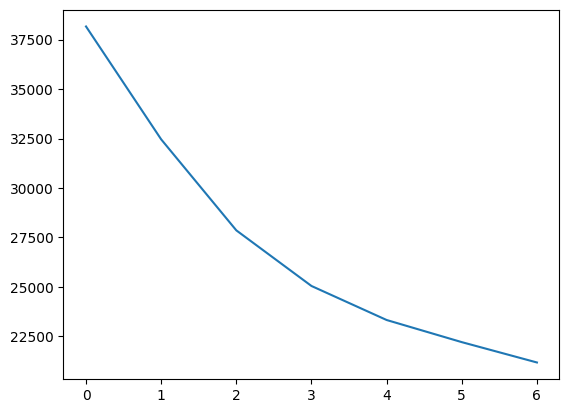

In [ ]:
ssd = []
rango_clusters = [2, 3, 4, 5, 6, 7, 8]
for k_cluster in rango_clusters:
    kmeans = KMeans(n_clusters=k_cluster, max_iter=50)
    kmeans.fit(X)

    ssd.append(kmeans.inertia_)

# Ploteamos el elbow curve
plt.plot(ssd)

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 0, 1, ..., 2, 0, 0], dtype=int32)

In [ ]:
df_fallecidos_vac_positive['Cluster_Id'] = kmeans.labels_
df_fallecidos_vac_positive.head()

<ipython-input-33-e8bfb41830d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['Cluster_Id'] = kmeans.labels_


,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,Categoria,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis,Cluster_Id
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,B34 - INFECCION VIRAL DE SITIO NO ESPECIFICADO,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,0.0,1,5,5,0,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,A41 - OTRAS SEPTICEMIAS,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21,1
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,"A16 - TUBERCULOSIS RESPIRATORIA, NO CONFIRMADA...",(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0,0
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,B97 - AGENTES VIRALES COMO CAUSA DE ENFERMEDAD...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0,0


In [ ]:
#df_fallecidos_vac_positive[df_fallecidos_vac_positive['Cluster_Id']==0]
df_fallecidos_vac_positive['Cluster_Id'].value_counts()

0    4566
2    1749
1    1061
Name: Cluster_Id, dtype: int64

In [ ]:
kmeans.get_params(True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 50,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
spec_cl = SpectralClustering(
    n_clusters=3,
    random_state=25,
    n_neighbors=20,
    affinity='nearest_neighbors'
)

In [ ]:
df_fallecidos_vac_positive['cluster_spec_id']= spec_cl.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_fallecidos_vac_positive.head()

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis,Cluster_Id,cluster_spec_id
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,0.0,1,5,5,0,1,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0,1,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21,0,1
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0,1,2
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0,1,0


## Clustering Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture
clustererGaussian = GaussianMixture(n_components=3, random_state=10)

In [ ]:
df_fallecidos_vac_positive['cluster_gaussian_id']= clustererGaussian.fit_predict(X)

<ipython-input-50-7392a131dc2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['cluster_gaussian_id']= clustererGaussian.fit_predict(X)


In [ ]:
df_fallecidos_vac_positive.head()

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis,Cluster_Id,cluster_spec_id,cluster_gaussian_id
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,0.0,1,5,5,0,1,0,1
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0,1,0,1
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21,0,1,2
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0,1,2,1
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0,1,0,1


## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


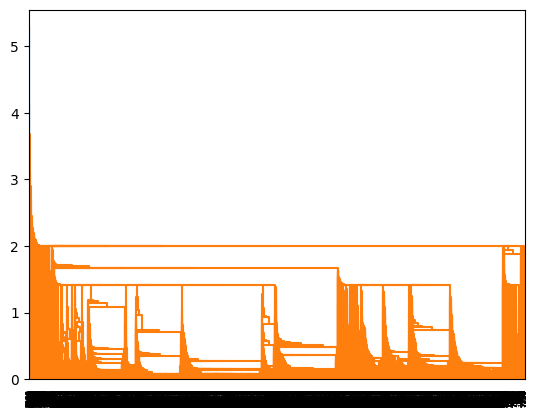

In [ ]:
mergings = linkage(X, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

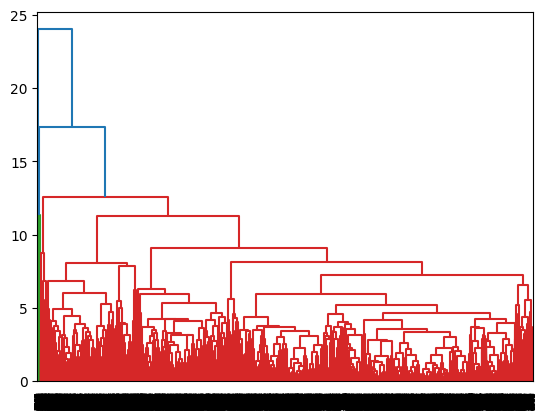

In [ ]:
mergings_complete = linkage(X, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

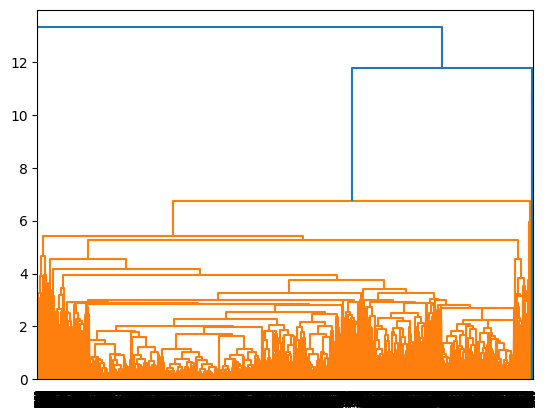

In [ ]:
mergings_average = linkage(X, method="average", metric='euclidean')
dendrogram(mergings_average)
plt.show()

In [ ]:
# 3 clusters
cluster_labels_complete = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
df_fallecidos_vac_positive['cluster_hierarchical_complete'] = cluster_labels_complete

<ipython-input-41-164b51003fc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['cluster_hierarchical_complete'] = cluster_labels_complete


In [ ]:
df_fallecidos_vac_positive.head()

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,Grupo,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis,Cluster_Id,cluster_hierarchical_complete
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,(B25 - B34) OTRAS ENFERMEDADES VIRALES,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,0.0,1,5,5,0,0,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0,0,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,(A30 - A49) OTRAS ENFERMEDADES BACTERIANAS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21,1,0
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,(A15 - A19) TUBERCULOSIS,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0,0,0
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,"(B95 - B98) BACTERIAS, VIRUS Y OTROS AGENTES I...",CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0,0,0


In [ ]:
cluster_labels_average = cut_tree(mergings_average, n_clusters=3).reshape(-1, )
df_fallecidos_vac_positive['cluster_hierarchical_average'] = cluster_labels_average

<ipython-input-43-caf1ae7ac1c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['cluster_hierarchical_average'] = cluster_labels_average


In [ ]:
df_fallecidos_vac_positive.head()

,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,Capitulo,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis,Cluster_Id,cluster_hierarchical_complete,cluster_hierarchical_average
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,40512.0,0.0,1,5,5,0,0,0,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,200201.0,0.0,1,50,50,0,0,0,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,140112.0,0.0,19,112,91,21,1,0,0
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,100401.0,0.0,1,33,33,0,0,0,0
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,CAPITULO I: CIERTAS ENFERMEDADES INFECCIOSAS Y...,210611.0,0.0,1,42,42,0,0,0,0


In [ ]:
cluster_labels_single = cut_tree(mergings, n_clusters=3).reshape(-1, )
df_fallecidos_vac_positive['cluster_hierarchical_single'] = cluster_labels_single
df_fallecidos_vac_positive.head()

<ipython-input-45-908d38c109ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['cluster_hierarchical_single'] = cluster_labels_single


,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,ubigeo_reniec,distanciaKm,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis,Cluster_Id,cluster_hierarchical_complete,cluster_hierarchical_average,cluster_hierarchical_single
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,40512.0,0.0,1,5,5,0,0,0,0,0
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,200201.0,0.0,1,50,50,0,0,0,0,0
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,140112.0,0.0,19,112,91,21,1,0,0,0
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,100401.0,0.0,1,33,33,0,0,0,0,0
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,210611.0,0.0,1,42,42,0,0,0,0,0


In [ ]:
cluster_labels_average_four = cut_tree(mergings_average, n_clusters=4).reshape(-1, )
df_fallecidos_vac_positive['cluster_hierarchical_average_four'] = cluster_labels_average_four

<ipython-input-46-974998b99884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['cluster_hierarchical_average_four'] = cluster_labels_average_four


In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(X)
df_fallecidos_vac_positive['Cluster_Id_four'] = kmeans.labels_
df_fallecidos_vac_positive.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-47-b0bf11725d33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['Cluster_Id_four'] = kmeans.labels_


,fallecido_id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,numero_atenciones,dias_fallecido_primera_dosis,dias_fallecido_segunda_dosis,dias_fallecido_entre_segunda_primera_dosis,Cluster_Id,cluster_hierarchical_complete,cluster_hierarchical_average,cluster_hierarchical_single,cluster_hierarchical_average_four,Cluster_Id_four
4,3599268,2021-06-14,88,F,Criterio SINADEF,40413.0,AREQUIPA,CASTILLA,URACA,0,...,1,5,5,0,0,0,0,0,0,1
11,510004,2021-07-02,64,M,Criterio investigaci+â-¦n Epidemiol+â-¦gica,210201.0,PUNO,AZANGARO,AZANGARO,0,...,1,50,50,0,0,0,0,0,0,1
19,13877633,2021-08-14,92,M,Criterio virol+â-¦gico,150118.0,LIMA,LIMA,LURIGANCHO,1,...,19,112,91,21,1,0,0,0,0,2
39,19380251,2021-06-19,73,M,Criterio cl+â-¡nico,110501.0,ICA,PISCO,PISCO,0,...,1,33,33,0,0,0,0,0,0,1
45,386803,2021-04-30,81,F,Criterio virol+â-¦gico,220910.0,SAN MARTIN,SAN MARTIN,MORALES,1,...,1,42,42,0,0,0,0,0,0,1


In [ ]:
# sklearn.metrics.calinski_harabasz_score(X, labels) = 0-

In [ ]:
clustererGaussianFour = GaussianMixture(n_components=4, random_state=10)
df_fallecidos_vac_positive['cluster_gaussian_id_four']= clustererGaussianFour.fit_predict(X)

<ipython-input-51-46d3a2074ff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fallecidos_vac_positive['cluster_gaussian_id_four']= clustererGaussianFour.fit_predict(X)


In [ ]:
spec_cl_four = SpectralClustering(
    n_clusters=4,
    random_state=25,
    n_neighbors=20,
    affinity='nearest_neighbors'
)
df_fallecidos_vac_positive['cluster_spec_id_four']= spec_cl_four.fit_predict(X)

NameError: name 'SpectralClustering' is not defined

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

calinski=metrics.calinski_harabasz_score(X, kmeans.labels_)
davies=davies_bouldin_score(X, kmeans.labels_)
silhouette=metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
print(calinski)
print(davies)
print(silhouette)

2149.732581476843
1.2694075691988473
0.30045550144565525


In [ ]:
#df_fallecidos_vac_positive.to_pickle("/MyDrive/MyDrive/DATABASES/clusterfinal4FINAL.pkl")

In [ ]:

import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

df_vis = pd.read_pickle("/content/drive/MyDrive/dataset/resultado_total_clustering2.pkl")

X = np.load("/content/drive/MyDrive/dataset/dataX.npy")
# PCA
#pca2 = PCA(n_components=2)
#principalComponents = pca2.fit_transform(X)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_res = tsne.fit_transform(X)

# x and y given as array_like objects
import plotly.express as px

fig = px.scatter(tsne_res, x=0, y=1, color=df_vis['Cluster_Id'])
fig.show()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

df_vis = pd.read_pickle("/content/drive/MyDrive/dataset/resultado_total_clustering2.pkl")

X = np.load("/content/drive/MyDrive/dataset/dataX.npy")
# PCA
pca2 = PCA(n_components=8)
pca = pca2.fit(X)

PC_values = np.arange(pca.n_components_) + 1

print(pca.explained_variance_ratio_)

plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:

df_vis = pd.read_pickle("/content/drive/MyDrive/dataset/resultado_total_clustering2.pkl")
df_vis['Cluster_Id'].value_counts()